In [1]:
import pandas as pd
import numpy as np
import datetime
import os,sys
import seaborn as sns 
import tensorflow as tf 
import math
import csv
import seaborn
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
train = pd.read_csv('/content/drive/My Drive/msbd5001-fall2020/train.csv')
test = pd.read_csv('/content/drive/My Drive/msbd5001-fall2020/test.csv')

In [8]:
# Data pre-processing
#train
# date year month day related
train['date_without_time'] = train['date'].apply(lambda x:x.split(' ')[0])
train['year'] = train['date_without_time'].apply(lambda x:x.split('/')[2])
train['month'] = train['date_without_time'].apply(lambda x:x.split('/')[1])
train['day'] = train['date_without_time'].apply(lambda x:x.split('/')[0])
train['date_without_time'] = train['year']+'/'+train['month']+'/'+train['day']
train['datetime'] = pd.to_datetime(train['date_without_time'])

# hour related
train['hours'] = train['date'].apply(lambda x:x.split(' ')[1].split(':')[0])
train['hours'] = train['hours'].astype('int')
train['if_rush_hours'] = train['hours'].apply(lambda x:0 if((x>6)&(x<20)) else 1)
train['last_hour'] = train['hours'].shift(1)
train['last_hour'] = train['last_hour'].replace(np.nan,0)
train['last_hour'] = train['last_hour'].astype('int')
train['next_hour'] = train['hours'].shift(periods=-1, axis=0)
train['next_hour'] = train['next_hour'].replace(np.nan,21)
train['next_hour'] = train['next_hour'].astype('int')
train['gap_hour'] = abs(train['last_hour']-train['hours'])
train['1gap_hour'] = abs(train['next_hour']-train['hours'])

# day of week related
train['day_of_week'] = train['datetime'].dt.dayofweek+1
train['last_day_of_week'] = train['day_of_week'].shift(1)
train['last_day_of_week'] = train['last_day_of_week'].replace(np.nan,7)
train['last_day_of_week'] = train['last_day_of_week'].astype('int')
train['next_day_of_week'] = train['day_of_week'].shift(periods=-1, axis=0)
train['next_day_of_week'] = train['next_day_of_week'].replace(np.nan,2)
train['next_day_of_week'] = train['next_day_of_week'].astype('int')
train['gap_day_of_week'] = abs(train['last_day_of_week']-train['day_of_week'])
train['gap_day_of_week'] = train['gap_day_of_week'].replace(6,2)
train['if_weekends'] = train['day_of_week'].apply(lambda x:0 if x<6 else 1)
train['gap_day']  = train['gap_day_of_week'].apply(lambda x:0 if x==0 else 1)

#gap code related
train['gap_add'] = train['gap_day'].astype('str')+train['gap_day_of_week'].astype('str')
train['gap_add'] = train['gap_add'].astype('int')

train['year'] = train['year'].astype('int')
train['month'] = train['month'].astype('int')
train['day'] = train['day'].astype('int')
train['datetime'] = train['datetime'].astype('int')

#test
test['date_without_time'] = test['date'].apply(lambda x:x.split(' ')[0])
test['year'] = test['date_without_time'].apply(lambda x:x.split('/')[2])
test['month'] = test['date_without_time'].apply(lambda x:x.split('/')[1])
test['day'] = test['date_without_time'].apply(lambda x:x.split('/')[0])
test['date_without_time'] = test['year']+'/'+test['month']+'/'+test['day']
test['datetime'] = pd.to_datetime(test['date_without_time'])

#hour
test['hours'] = test['date'].apply(lambda x:x.split(' ')[1].split(':')[0])
test['hours'] = test['hours'].astype('int')
test['if_rush_hours'] = test['hours'].apply(lambda x:0 if ((x>6)&(x<20)) else 1)
test['last_hour'] = test['hours'].shift(1)
test['last_hour'] = test['last_hour'].replace(np.nan,0)
test['last_hour'] = test['last_hour'].astype('int')
test['next_hour'] = test['hours'].shift(periods=-1, axis=0)
test['next_hour'] = test['next_hour'].replace(np.nan,0)
test['next_hour'] = test['next_hour'].astype('int')
test['gap_hour'] = abs(test['last_hour']-test['hours'])
test['1gap_hour'] = abs(test['next_hour']-test['hours'])
#day_of_week
test['day_of_week'] = test['datetime'].dt.dayofweek+1
test['if_weekends'] = test['day_of_week'].apply(lambda x:0 if x<6 else 1)
test['last_day_of_week'] = test['day_of_week'].shift(1)
test['last_day_of_week'] = test['last_day_of_week'].replace(np.nan,7)
test['last_day_of_week'] = test['last_day_of_week'].astype('int')
test['next_day_of_week'] = test['day_of_week'].shift(periods=-1, axis=0)
test['next_day_of_week'] = test['next_day_of_week'].replace(np.nan,2)
test['next_day_of_week'] = test['next_day_of_week'].astype('int')
test['gap_day_of_week'] = abs(test['last_day_of_week']-test['day_of_week'])
test['gap_day_of_week'] = test['gap_day_of_week'].replace(6,2)
test['gap_day']  = test['gap_day_of_week'].apply(lambda x:0 if x==0 else 1)

#gap code related
test['gap_add'] = test['gap_day'].astype('str')+test['gap_day_of_week'].astype('str')
test['gap_add'] = test['gap_add'].astype('int')

test['year'] = test['year'].astype('int')
test['month'] = test['month'].astype('int')
test['day'] = test['day'].astype('int')
test['datetime'] = test['datetime'].astype('int')

In [13]:
test.head()
new_test = test[['datetime','year','month','day','hours','if_rush_hours','last_hour','gap_hour','next_hour','day_of_week','last_day_of_week','gap_day_of_week','if_weekends','gap_add']]
new_test.to_csv('/content/drive/MyDrive/msbd5001-fall2020/new_test_.csv')

In [12]:
#less
train.head()
new_train = train[['datetime','year','month','day','hours','if_rush_hours','last_hour','gap_hour','next_hour','day_of_week','last_day_of_week','gap_day_of_week','if_weekends','gap_add','speed']]
new_train.to_csv('/content/drive/MyDrive/msbd5001-fall2020/new_train_.csv')

In [10]:
### speed related to day_of_week
t = train[['day_of_week','speed']]
t1 = t.groupby('day_of_week').agg('mean').reset_index()
t1.rename(columns={'speed':'avg_speed_per_day_of_week'},inplace=True)

t2 = t.groupby('day_of_week').agg('min').reset_index()
t2.rename(columns={'speed':'min_speed_per_day_of_week'},inplace=True)

t3 = t.groupby('day_of_week').agg('max').reset_index()
t3.rename(columns={'speed':'max_speed_per_day_of_week'},inplace=True)

t4 = t.groupby('day_of_week').agg('median').reset_index()
t4.rename(columns={'speed':'median_speed_per_day_of_week'},inplace=True)

t = pd.merge(t,t1, on ='day_of_week',how='left')
t = pd.merge(t,t2, on ='day_of_week',how='left')
t = pd.merge(t,t3, on ='day_of_week',how='left')
t = pd.merge(t,t4, on ='day_of_week',how='left')

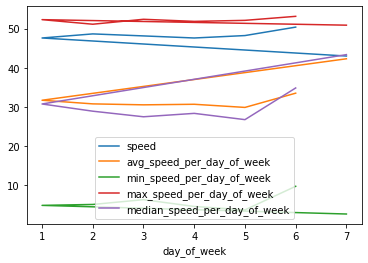

In [11]:
t.drop_duplicates('day_of_week').plot.line(x = 'day_of_week')

In [12]:
### speed related to if_weekends
t_1 = train[['if_weekends','speed']]
t5 = t_1.groupby('if_weekends').agg('mean').reset_index()
t5.rename(columns={'speed':'avg_speed_if_weekends'},inplace=True)

t6 = t_1.groupby('if_weekends').agg('min').reset_index()
t6.rename(columns={'speed':'min_speed_if_weekends'},inplace=True)

t7 = t_1.groupby('if_weekends').agg('median').reset_index()
t7.rename(columns={'speed':'median_speed_if_weekends'},inplace=True)

t8 = t_1.groupby('if_weekends').agg('max').reset_index()
t8.rename(columns={'speed':'max_speed_if_weekends'},inplace=True)

t_1 = pd.merge(t_1,t5, on ='if_weekends',how='left')
t_1 = pd.merge(t_1,t6, on ='if_weekends',how='left')
t_1 = pd.merge(t_1,t7, on ='if_weekends',how='left')
t_1 = pd.merge(t_1,t8, on ='if_weekends',how='left')

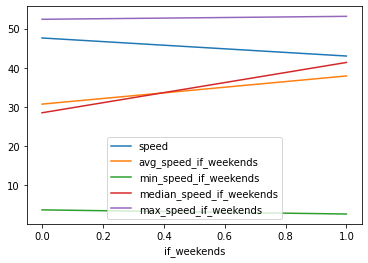

In [13]:
t_1.drop_duplicates('if_weekends').plot.line(x ='if_weekends')

In [14]:
### speed related to each hour
t_2 = train[['hours','speed']]
t10 = t_2.groupby('hours').agg('mean').reset_index()
t10.rename(columns={'speed':'avg_speed_per_hour'},inplace=True)

t11 = t_2.groupby('hours').agg('min').reset_index()
t11.rename(columns={'speed':'min_speed_per_hour'},inplace=True)

t12 = t_2.groupby('hours').agg('max').reset_index()
t12.rename(columns={'speed':'max_speed_per_hour'},inplace=True)

t9 = t_2.groupby('hours').agg('median').reset_index()
t9.rename(columns={'speed':'median_speed_per_hour'},inplace=True)

t_2 = pd.merge(t_2,t9, on ='hours',how='left')
t_2 = pd.merge(t_2,t10, on ='hours',how='left')
t_2 = pd.merge(t_2,t11, on ='hours',how='left')
t_2 = pd.merge(t_2,t12, on ='hours',how='left')

In [15]:
### speed related to each day
t_3 = train[['day','speed']]
t13 = t_3.groupby('day').agg('mean').reset_index()
t13.rename(columns={'speed':'avg_speed_per_day'},inplace=True)

t14 = t_3.groupby('day').agg('min').reset_index()
t14.rename(columns={'speed':'min_speed_per_day'},inplace=True)

t15 = t_3.groupby('day').agg('max').reset_index()
t15.rename(columns={'speed':'max_speed_per_day'},inplace=True)

t16 = t_3.groupby('day').agg('median').reset_index()
t16.rename(columns={'speed':'median_speed_per_day'},inplace=True)

t_3 = pd.merge(t_3,t13, on ='day',how='left')
t_3 = pd.merge(t_3,t14, on ='day',how='left')
t_3 = pd.merge(t_3,t15, on ='day',how='left')
t_3 = pd.merge(t_3,t16, on ='day',how='left')

In [16]:
### speed related to each month
t_4 = train[['month','speed']]
t17 = t_4.groupby('month').agg('mean').reset_index()
t17.rename(columns={'speed':'avg_speed_per_month'},inplace=True)

t18 = t_4.groupby('month').agg('min').reset_index()
t18.rename(columns={'speed':'min_speed_per_month'},inplace=True)

t19 = t_4.groupby('month').agg('max').reset_index()
t19.rename(columns={'speed':'max_speed_per_month'},inplace=True)

t20 = t_4.groupby('month').agg('median').reset_index()
t20.rename(columns={'speed':'median_speed_per_month'},inplace=True)

t_4 = pd.merge(t_4,t17, on ='month',how='left')
t_4 = pd.merge(t_4,t18, on ='month',how='left')
t_4 = pd.merge(t_4,t19, on ='month',how='left')
t_4 = pd.merge(t_4,t20, on ='month',how='left')

In [17]:
### speed related to if_rush_hours
t_5 = train[['if_rush_hours','speed']]
t21 = t_5.groupby('if_rush_hours').agg('mean').reset_index()
t21.rename(columns={'speed':'avg_speed_if_rush_hours'},inplace=True)

t22 = t_5.groupby('if_rush_hours').agg('min').reset_index()
t22.rename(columns={'speed':'min_speed_if_rush_hours'},inplace=True)

t23 = t_5.groupby('if_rush_hours').agg('median').reset_index()
t23.rename(columns={'speed':'median_speed_if_rush_hours'},inplace=True)

t24 = t_5.groupby('if_rush_hours').agg('max').reset_index()
t24.rename(columns={'speed':'max_speed_if_rush_hours'},inplace=True)

t_5 = pd.merge(t_5,t21, on ='if_rush_hours',how='left')
t_5 = pd.merge(t_5,t22, on ='if_rush_hours',how='left')
t_5 = pd.merge(t_5,t23, on ='if_rush_hours',how='left')
t_5 = pd.merge(t_5,t24, on ='if_rush_hours',how='left')